In [1]:
import numpy as np
import pandas as pd
import json
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
# read data
df = pd.read_csv('data/combined_data.csv')

In [3]:
# convert to dummy variable
df['isWalking'] = df['mode'].isin(['walking'])
df['isBicycling'] = df['mode'].isin(['bicycling', 'walking'])

# Only horizontal Model

In [4]:
model_horiz = smf.ols(formula='duration ~ distance_horizontal + distance_horizontal:isBicycling + distance_horizontal:isWalking', data=df)
fit_horiz = model_horiz.fit()

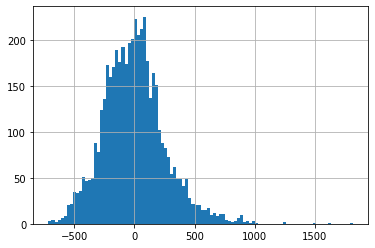

In [5]:
fit_horiz.resid.hist(bins=100)

In [6]:
fit_horiz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.699e+04
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:40:05   Log-Likelihood:                -33478.
No. Observations:                4800   AIC:                         6.696e+04
Df Residuals:                    4796   BIC:                         6.699e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 197.7785     10.632     18.602      0.000     176.935     218.622
distance_horizontal                         0.1911      0.005     39.612      0.000       0.182       0.201
distance_horizontal:isBicycling[T.True]     0.1471      0.004     39.522      0.000       0.140       0.154
distance_horizontal:isWalking[T.True]       0.5514      0.004    148.057      0.000       0.544       0.559
==============================================================================
Omnibus:                      493.049   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1007.245
Skew:                           0.658   Prob(JB):                    1.90e-219
Kurtosis:                       4.818   Cond. No.                     9.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

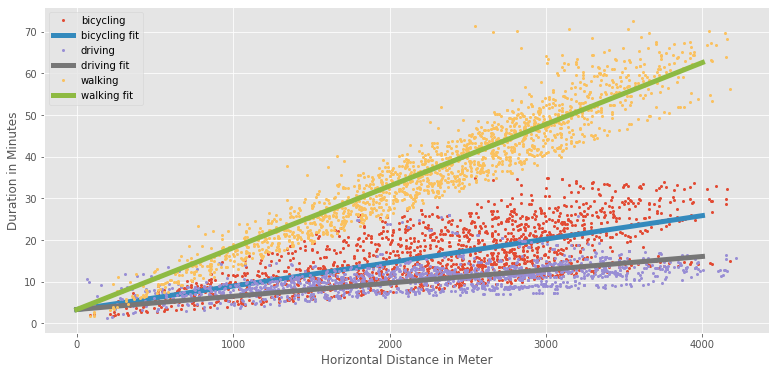

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(13, 6))

groups = df.groupby('mode')
for name, group in groups:
    plt.plot(group.distance_horizontal, group.duration/60, marker='o', linestyle='', ms=2, label=name)
    
    # grid
    x = np.linspace(0, 4000)
    if name == 'driving':
      y_hat = fit_horiz.params['Intercept'] + x * fit_horiz.params['distance_horizontal']

    elif name == 'bicycling':
      y_hat = fit_horiz.params['Intercept'] + x * fit_horiz.params['distance_horizontal'] + x * fit_horiz.params['distance_horizontal:isBicycling[T.True]']   

    else:
      y_hat = fit_horiz.params['Intercept'] + x * fit_horiz.params['distance_horizontal'] + x * fit_horiz.params['distance_horizontal:isBicycling[T.True]'] + x * fit_horiz.params['distance_horizontal:isWalking[T.True]']

    plt.plot(x, y_hat/60, lw=5, label=name+' fit')

plt.xlabel('Horizontal Distance in Meter')
plt.ylabel('Duration in Minutes')
plt.legend();

# Only vertical Model

In [8]:
model_vertic = smf.ols(formula='duration ~ distance_vertical + distance_vertical:isBicycling + distance_vertical:isWalking', data=df)
fit_vertic = model_vertic.fit()

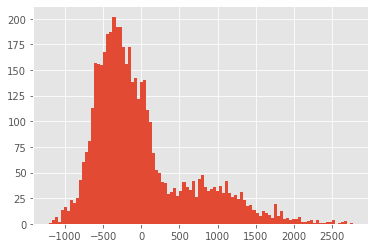

In [9]:
fit_vertic.resid.hist(bins=100)

In [10]:
fit_vertic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     1378.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:40:09   Log-Likelihood:                -37874.
No. Observations:                4800   AIC:                         7.576e+04
Df Residuals:                    4796   BIC:                         7.578e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              1056.6090     11.712     90.215      0.000    1033.648    1079.570
distance_vertical                        -2.9398      0.282    -10.442      0.000      -3.492      -2.388
distance_vertical:isBicycling[T.True]     6.3933      0.359     17.826      0.000       5.690       7.096
distance_vertical:isWalking[T.True]      13.0262      0.351     37.138      0.000      12.339      13.714
==============================================================================
Omnibus:                      922.449   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.957
Skew:                           1.252   Prob(JB):                         0.00
Kurtosis:                       4.301   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

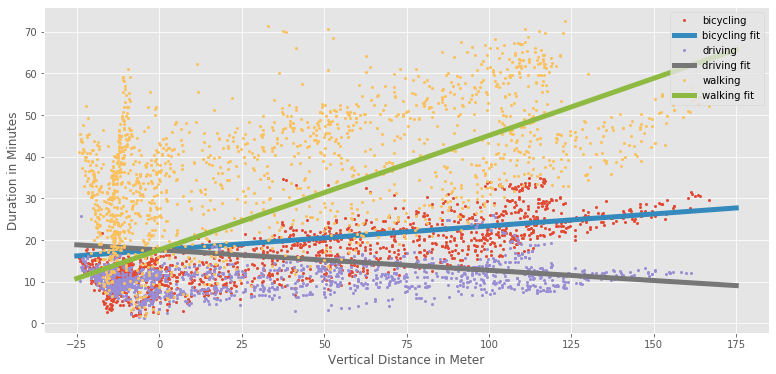

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(13, 6))

groups = df.groupby('mode')
for name, group in groups:
    plt.plot(group.distance_vertical, group.duration/60, marker='o', linestyle='', ms=2, label=name)
    
    # grid
    x = np.linspace(-25, 175)
    if name == 'driving':
      y_hat = fit_vertic.params['Intercept'] + x * fit_vertic.params['distance_vertical']

    elif name == 'bicycling':
      y_hat = fit_vertic.params['Intercept'] + x * fit_vertic.params['distance_vertical'] + x * fit_vertic.params['distance_vertical:isBicycling[T.True]']   

    else:
      y_hat = fit_vertic.params['Intercept'] + x * fit_vertic.params['distance_vertical'] + x * fit_vertic.params['distance_vertical:isBicycling[T.True]'] + x * fit_vertic.params['distance_vertical:isWalking[T.True]']

    plt.plot(x, y_hat/60, lw=5, label=name+' fit')

plt.xlabel('Vertical Distance in Meter')
plt.ylabel('Duration in Minutes')
plt.legend();

# Combined Model

In [12]:
model_combi = smf.ols(formula='duration ~ distance_horizontal + distance_horizontal:isBicycling + distance_horizontal:isWalking + distance_vertical + distance_vertical:isBicycling + distance_vertical:isWalking', data=df)
fit_combi = model_combi.fit()

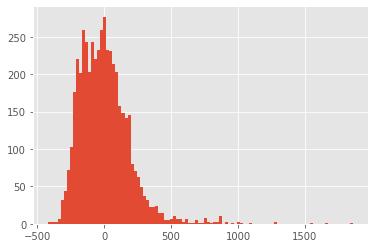

In [15]:
fit_combi.resid.hist(bins=100);

In [16]:
fit_combi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.671e+04
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:41:08   Log-Likelihood:                -31956.
No. Observations:                4800   AIC:                         6.393e+04
Df Residuals:                    4793   BIC:                         6.397e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 232.0007      7.772     29.851      0.000     216.764     247.237
distance_horizontal                         0.1708      0.004     43.268      0.000       0.163       0.179
distance_horizontal:isBicycling[T.True]     0.0583      0.004     16.093      0.000       0.051       0.065
distance_horizontal:isWalking[T.True]       0.5849      0.004    158.874      0.000       0.578       0.592
distance_vertical                           0.4395      0.100      4.410      0.000       0.244       0.635
distance_vertical:isBicycling[T.True]       4.9180      0.140     35.199      0.000       4.644       5.192
distance_vertical:isWalking[T.True]        -1.8777      0.139    -13.533      0.000      -2.150      -1.606
==============================================================================
Omnibus:                     1864.749   Durbin-Watson:                   0.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13730.352
Skew:                           1.671   Prob(JB):                         0.00
Kurtosis:                      10.581   Cond. No.                     9.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pro Meter horizontaler Distanz braucht man mit dem Auto 0.17 Sekunden.
Pro Meter horizontaler Distanz braucht man mit dem Fahrrad 0.23 Sekunden.
Pro Meter horizontaler Distanz braucht man zu Fuß 0.81 Sekunden.

--> Auf flachen Strecken sind die Zeiten von Fahrad und Auto also sehr ähnlich. 
--> Fußweg braucht länger.

Pro Meter vertikaler Distanz braucht man mit dem Auto 0.44 Sekunden.
Pro Meter horizontaler Distanz braucht man mit dem Fahrrad 5.36 Sekunden.
Pro Meter horizontaler Distanz braucht man zu Fuß 3.5 Sekunden.

--> Bei ansteigenden Strecken büßt besonders das Fahrrad ein. 
--> Das Auto hat kaum Mehrzeiten wegen des Hügels.
--> Zu Fuß verliert man weniger als das Fahrrad, was mit der gerinden GRundgeschwindigkeit zusammenhängen wird.

Das ist vielleicht einer der Gründe wieso in hügeligen Städten weniger Fahrrad gefahren wird. Es ist tatsähclich eine kluge Entscheidung da der relative Verlust am Berg am größten ist. 

In [17]:
Image(url= "https://nationaler-radverkehrsplan.de/sites/default/files/images/nachrichten/srv-2018-06-weghaeufigkeit-vergleich-fahrrad-pedelec-topografie.jpg")

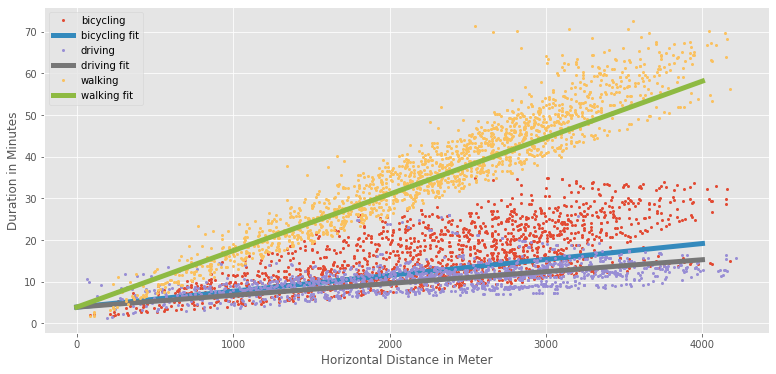

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(13, 6))

groups = df.groupby('mode')
for name, group in groups:
    plt.plot(group.distance_horizontal, group.duration/60, marker='o', linestyle='', ms=2, label=name)
    
    # grid
    x = np.linspace(0, 4000)
    if name == 'driving':
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_horizontal']

    elif name == 'bicycling':
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_horizontal'] + x * fit_combi.params['distance_horizontal:isBicycling[T.True]']   

    else:
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_horizontal'] + x * fit_combi.params['distance_horizontal:isBicycling[T.True]'] + x * fit_combi.params['distance_horizontal:isWalking[T.True]']

    plt.plot(x, y_hat/60, lw=5, label=name+' fit')

plt.xlabel('Horizontal Distance in Meter')
plt.ylabel('Duration in Minutes')
plt.legend();

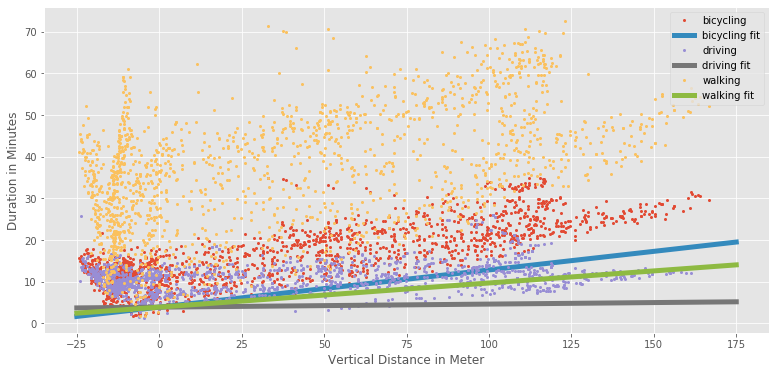

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(13, 6))

groups = df.groupby('mode')
for name, group in groups:
    plt.plot(group.distance_vertical, group.duration/60, marker='o', linestyle='', ms=2, label=name)
    
    # grid
    x = np.linspace(-25, 175)
    if name == 'driving':
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_vertical']

    elif name == 'bicycling':
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_vertical'] + x * fit_combi.params['distance_vertical:isBicycling[T.True]']   

    else:
      y_hat = fit_combi.params['Intercept'] + x * fit_combi.params['distance_vertical'] + x * fit_combi.params['distance_vertical:isBicycling[T.True]'] + x * fit_combi.params['distance_vertical:isWalking[T.True]']

    plt.plot(x, y_hat/60, lw=5, label=name+' fit')

plt.xlabel('Vertical Distance in Meter')
plt.ylabel('Duration in Minutes')
plt.legend();

In [ ]:
# 3D Plot

In [ ]:
x = np.arange(-25, 150)
y = np.arange(0, 4000)
xv, yv = np.meshgrid(x, y)

z_driving = fit_combi.params['Intercept'] + xv.flatten() * fit_combi.params['distance_vertical'] + yv.flatten() * fit_combi.params['distance_horizontal']
z_bicycle = z_driving + xv.flatten() * fit_combi.params['distance_vertical:isBicycling[T.True]'] + yv.flatten() * fit_combi.params['distance_horizontal:isBicycling[T.True]']    
z_walking = z_bicycle + xv.flatten() * fit_combi.params['distance_vertical:isWalking[T.True]'] + yv.flatten() * fit_combi.params['distance_horizontal:isWalking[T.True]']    


z_bicycle = z_bicycle.reshape((y.shape[0], x.shape[0]))
z_driving = z_driving.reshape((y.shape[0], x.shape[0]))
z_walking = z_walking.reshape((y.shape[0], x.shape[0]))

In [ ]:
fig = px.scatter_3d(df, x='distance_vertical', y='distance_horizontal', z='duration',
              color='mode', width=1000, height=800)
fig.update_traces(marker_size = 2)

yellow = [[0, '#FFDB58'], [1, '#FFDB58']]
blue = [[0, '#034efc'], [1, '#034efc']]
red = [[0, '#fc0330'], [1, '#fc0330']]

fig.add_trace(go.Surface(x=x, y=y, z=z_driving, showscale=False, colorscale=yellow))
fig.add_trace(go.Surface(x=x, y=y, z=z_bicycle, showscale=False, colorscale=blue))
fig.add_trace(go.Surface(x=x, y=y, z=z_walking, showscale=False, colorscale=red))

fig.show()

In [ ]:
# todo 3D plot
# check wie sies in der Vorlesung gemacht haben

# Comparison

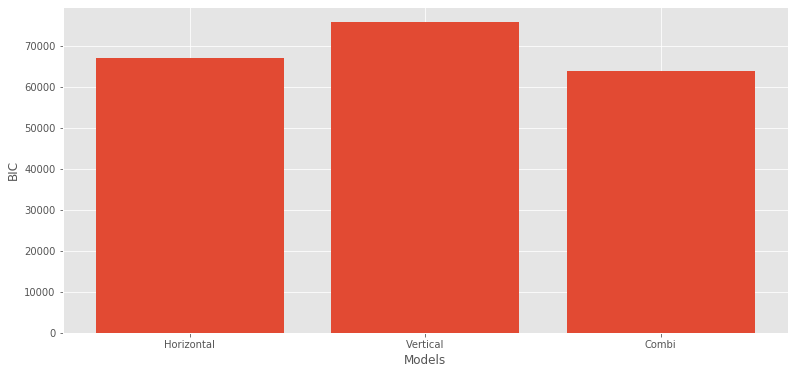

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(13, 6))

plt.bar(['Horizontal', 'Vertical', 'Combi'], [fit_horiz.bic, fit_vertic.bic,  fit_combi.bic])
plt.xlabel('Models')
plt.ylabel('BIC');

In [21]:
# horizontal model better than vertical model
# combined model better than horiziontal model

# most information in horiziontal but vertical adds enough information to 
# justify higher complexity

# store residuals

In [32]:
df['resid_combi'] = fit_combi.resid
df['resid_horiz'] = fit_horiz.resid
df['resid_vertic'] = fit_vertic.resid

In [33]:
df.to_csv('data/combined_data_residuals.csv')